In [27]:
from math import pi, sqrt, tan
from numpy import linspace, shape, array
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Parameters definition

GM = 4*pi*pi # UA^3 / yr^2

n = 200

v_0 = 2.*pi # UA/yr
r_0 = 1. # UA
the_0 = 0.
dt = 2e-2 # yr

e_n = [] # M* AU^2/yr^2
x_pos = [] # UA
y_pos = [] # UA
r_pos = []
th_pos = []
m = 1. #e-5 # Solar Mass

# Functions definition

def acce_i(r):
    return -GM / (r*r*r)

def ener(r):
    return -(GM*m) / (2*r)

In [3]:
# Euler method

x_n = r_0
y_n = 0.
vx_n = 0.
vy_n = v_0

r_n = sqrt(x_n*x_n + y_n*y_n)
th = 0.

e_n.append( ener(r_n) )
x_pos.append( x_n )
y_pos.append( x_n )
r_pos.append( r_n )
th_pos.append( th )

for t in range(n):
    tmp_x = x_n
    tmp_y = y_n
    tmp_th = th
    
    vx_n = vx_n + tmp_x*acce_i(r_n)*dt
    vy_n = vy_n + tmp_y*acce_i(r_n)*dt
    
    x_n = tmp_x + vx_n*dt
    y_n = tmp_y + vy_n*dt
      
    r_n = sqrt(x_n*x_n + y_n*y_n)
    th = tmp_th + ( sqrt(vx_n*vx_n + vy_n*vy_n)/r_n ) * dt
        
    e_n.append( ener(r_n) )
    x_pos.append( x_n )
    y_pos.append( y_n )
    r_pos.append( r_n )
    th_pos.append( th )

201


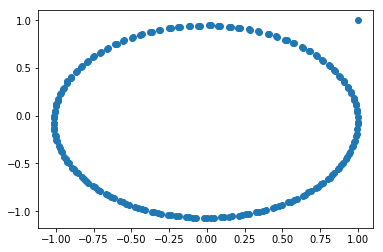

In [9]:
plt.plot(x_pos,y_pos,'o')
print(len(x_pos))

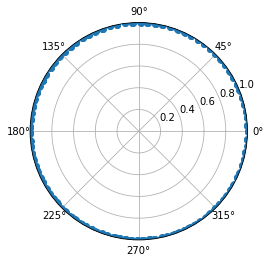

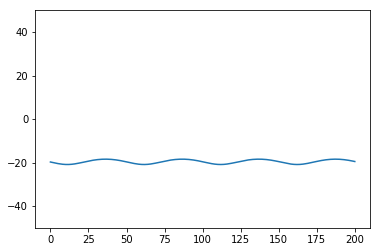

In [65]:
plt.polar(th_pos,r_pos,'o')
plt.show()

plt.plot(e_n)
plt.ylim(-50,50)
plt.show()

In [54]:
def orbit(init, t):
    
    dx = init[0]
    dy = init[1]
    dth = init[4]
        
    GM = 4*pi*pi # UA^3 / yr^2
    
    r = sqrt(init[2]*init[2] + init[3]*init[3])
    a = -GM / (r*r*r)

    dv_x = a*init[2]
    dv_y = a*init[3]
    
    dthe = (sqrt(dv_x*dv_x + dv_y*dv_y)) / r
    
    return array([dv_x, dv_y, dx, dy, dthe], float)

In [76]:
t = linspace(0, 4, 201)

init = [0., 2.*pi, 1., 0., 0.]

sol,outodeint = odeint(orbit, init, t, full_output=True)
vxx, vyy, xx, yy, th = sol.T

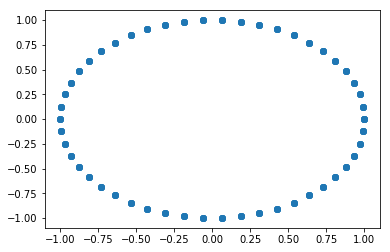

In [77]:
plt.plot(xx, yy, 'o')

r_pos = []
ener = []

for i in range(len(xx)):
    r_pos.append( sqrt(xx[i]*xx[i] + yy[i]*yy[i]) )
    ener.append( -GM / (2*r_pos[i]) )
    

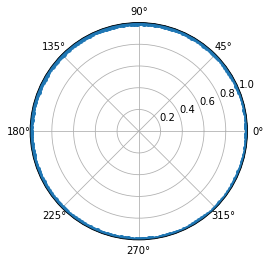

In [78]:
plt.polar(th,r_pos,'o')
plt.show()

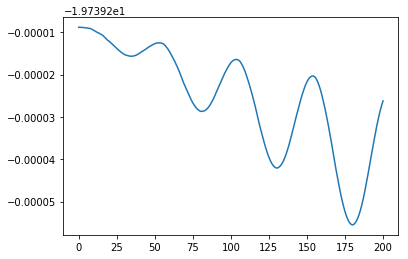

In [79]:
plt.plot(ener)
plt.show()